In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'D:\Attivo Trainning\Technical Videos\AI_ML\Jupyter Notebook Daily Practice\Day10_10_07_2025\Wine_pca\Wine.csv')

In [3]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [5]:
df.shape

(178, 14)

In [6]:
X = df.drop("Customer_Segment", axis = 1)

In [7]:
X.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
import matplotlib.pyplot as plt

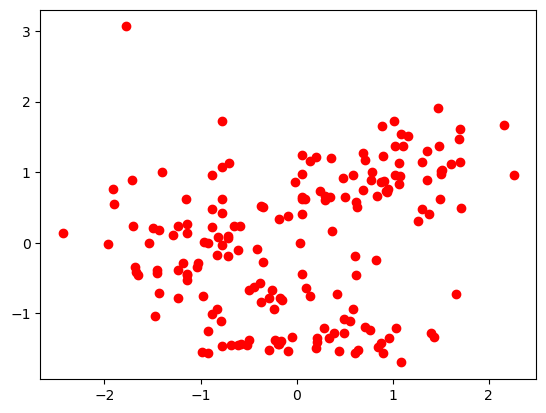

In [11]:
plt.scatter(X_scaled[:,0], X_scaled[:,6], color = 'red')

In [12]:
from sklearn.cluster import KMeans

In [13]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 44)
kmeans.fit(X_scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=44)

In [14]:
wcsse = []
for i in range (1, 12):
    kmean = KMeans(n_clusters = i, init = 'k-means++', random_state = 33)
    kmean.fit(X_scaled)
    wcsse.append(kmean.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

In [15]:
wcsse

[2314.0,
 1659.9511977619795,
 1282.4635183465316,
 1205.1325367766265,
 1116.160915915075,
 1066.0010798295696,
 1018.6936010660828,
 959.7012543254131,
 908.4132836433494,
 902.7734169745305,
 861.4229197313877]

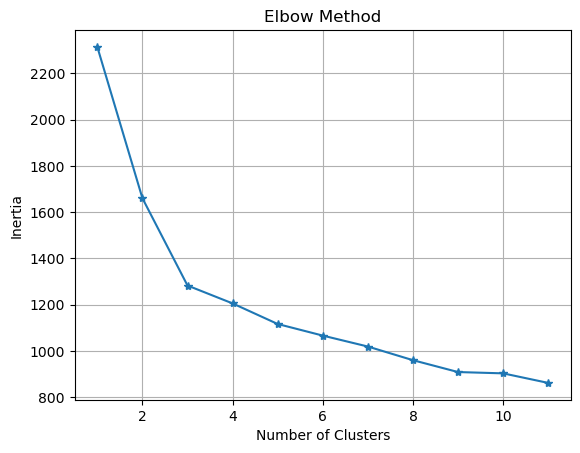

In [16]:
plt.plot(range(1,12), wcsse, marker = '*')
plt.title("Elbow Method")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [17]:
kmeans1 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 44)
kmeans1.fit(X_scaled)
clusters = kmeans1.predict(X_scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [18]:
#clusters

In [19]:
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [20]:
X_scaled['Clusters'] = clusters

In [21]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[ 3.14240259,  1.7957291 ],
       [ 2.17284943,  0.05022192],
       [ 2.39208987,  1.27937115],
       [ 3.48200902,  3.06424947],
       [ 0.92713884,  0.9104627 ],
       [ 2.83149479,  2.39365537],
       [ 2.30662383,  1.44762894],
       [ 1.89661092,  1.77884282],
       [ 2.38193738,  1.23679396],
       [ 2.63201942,  1.13584801],
       [ 3.31069344,  1.69411732],
       [ 1.66154071,  0.84991662],
       [ 2.01233971,  0.94209724],
       [ 3.30371599,  1.52869843],
       [ 4.07115765,  2.54602079],
       [ 2.13450951,  1.85846841],
       [ 1.95952613,  2.44036066],
       [ 1.74195027,  1.75745465],
       [ 3.28698396,  2.82033837],
       [ 1.95825338,  1.28518181],
       [ 2.99859419,  1.17094412],
       [ 1.04207518,  0.36867864],
       [ 2.48398328,  0.27450222],
       [ 1.64056137, -0.23980654],
       [ 1.74534658, -0.06163981],
       [ 0.91235413,  0.93016115],
       [ 1.68441518,  0.88442896],
       [ 1.20000431,  0.13969961],
       [ 2.09667956,

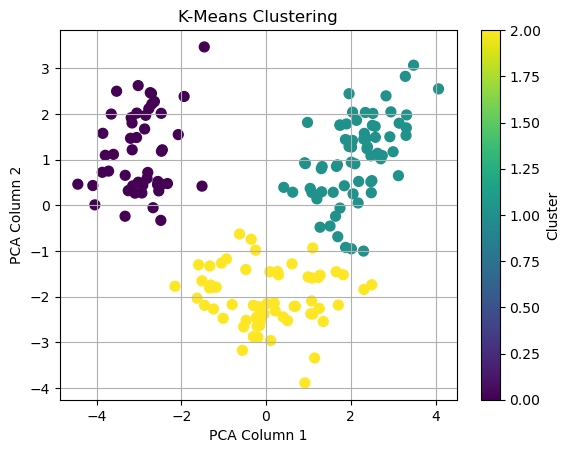

In [24]:
plt.scatter(X_pca[:,0], X_pca[:,1], c = clusters, cmap = 'viridis', s = 50)
plt.title("K-Means Clustering")
plt.xlabel("PCA Column 1")
plt.ylabel("PCA Column 2")
plt.colorbar(label = 'Cluster')
plt.grid(True)
plt.show()